## Bivariate Gaussian Distribution

The following code has been taken and adpated from: https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/

The code below is used to display a graph of a bivariate Gaussian distribution. 

In [2]:
# Here we import the appropriate packages required
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 15}) 
#This allows us to control the font size of the text in our graph so that it is appropriate for a A4 pdf.

In [3]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60 # This defines how many data points per axis we will have. 
X = np.linspace(-3, 3, N) # X and Y defined our x-axis range and y-axis range respectively. 
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

In the next code chunk, we define $\mu$ and $\Sigma$ respectively as the following: 
$$ \mu = \left[ {\begin{array}{c}
   1 \\
   0 
  \end{array} } \right] $$
  
 $$ \Sigma = \left[ {\begin{array}{c}
   1 & -0.5 \\
   -0.5 & 1.5 
  \end{array} } \right] $$ 

In [4]:
#Mean vector and covariance matrix
mu = np.array([1., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

In [5]:
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [6]:
# Here we build our multivariate normal based on mu, Sigma and X, Y
from scipy.stats import multivariate_normal
F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

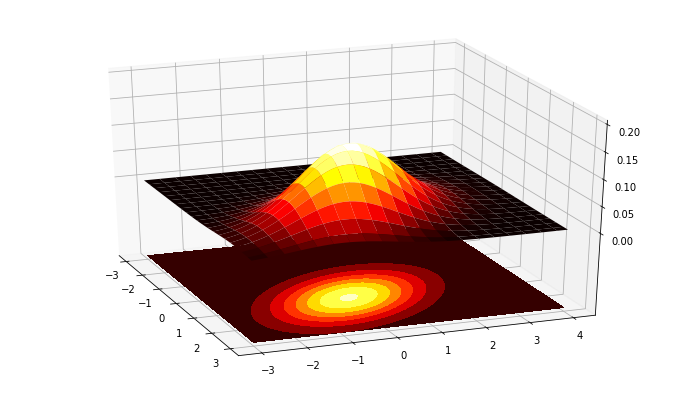

In [9]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
fig.set_size_inches(12, 7)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.hot)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.hot)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
plt.show()

In [109]:
fig.savefig('BivariateGraph.png', dpi=100) #This saves the graph and names it. 